# **Quand la finance dépasse l'économie : Une analyse des ratios Capitalisation/PIB et Dette/PIB**

**Importation des bibliothèques**

In [31]:
!pip install pandas matplotlib seaborn yfinance requests
import yfinance as yf
import pandas as pd
import os

**Téléchargement des données**

In [33]:
# Télécharger les données boursières (ex : S&P 500)
sp500 = yf.download("^GSPC", start="1980-01-01", end="2023-01-01")

# Télécharger des données macroéconomiques (ex : PIB des États-Unis)
# Exemple avec un fichier CSV téléchargé depuis FRED :
# Lien pour télécharger le PIB des États-Unis : https://fred.stlouisfed.org/series/GDP

# Get the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# Specify the file path to your GDP.csv file
file_path_gdp = os.path.join(current_directory, "GDP.csv")  # If GDP.csv is in the current directory
file_path_debt = os.path.join(current_directory, "GFDEBTN.csv") # If GFDEBTN.csv is in the current directory


# Check if the GDP file exists in the specified path
if os.path.exists(file_path_gdp):
    gdp_data = pd.read_csv("GDP.csv", parse_dates=["DATE"]) # Use file_path_gdp to ensure correct path
    gdp_data.rename(columns={"DATE": "Date", "GDP": "PIB"}, inplace=True)
else:
    print(f"File not found at path: {file_path_gdp}")
    # Handle the case where the file doesn't exist (e.g., download it, exit the program)

# Check if the Debt file exists in the specified path
if os.path.exists("GFDEBTN.csv"):
    debt_data = pd.read_csv("GFDEBTN.csv", parse_dates=["DATE"]) # Use file_path_debt to ensure correct path
    debt_data.rename(columns={"DATE": "Date", "GFDEBTN": "Dette"}, inplace=True)
else:
    print(f"File not found at path: {file_path_debt}")
    # Handle the case where the file doesn't exist (e.g., download it, exit the program)


# Afficher les premières lignes des données
print(sp500.head())
print(gdp_data.head())
print(debt_data.head())

[*********************100%***********************]  1 of 1 completed

Current working directory: /content
File not found at path: /content/GDP.csv
File not found at path: /content/GFDEBTN.csv
Price            Close        High         Low  Open    Volume
Ticker           ^GSPC       ^GSPC       ^GSPC ^GSPC     ^GSPC
Date                                                          
1980-01-02  105.760002  108.430000  105.290001   0.0  40610000
1980-01-03  105.220001  106.080002  103.260002   0.0  50480000
1980-01-04  106.519997  107.080002  105.089996   0.0  39130000
1980-01-07  106.809998  107.800003  105.800003   0.0  44500000
1980-01-08  108.949997  109.290001  106.290001   0.0  53390000
        Date      PIB
0 1947-01-01  243.164
1 1947-04-01  245.968
2 1947-07-01  249.585
3 1947-10-01  259.745
4 1948-01-01  265.742
        Date   Dette
0 1966-01-01  320999
1 1966-04-01  316097
2 1966-07-01  324748
3 1966-10-01  329319
4 1967-01-01  330947


**Traitement des données**

In [34]:
# Télécharger les données boursières (S&P 500)
sp500 = yf.download("^GSPC", start="1980-01-01", end="2023-01-01")
sp500_reset = sp500.reset_index()

# Charger les données macroéconomiques (exemple avec des fichiers CSV)
gdp_data = pd.read_csv("/content/sample_data/GDP.csv", parse_dates=["observation_date"])
gdp_data.rename(columns={"observation_date": "Date", "GDP": "PIB"}, inplace=True)

debt_data = pd.read_csv("/content/sample_data/GFDEBTN.csv", parse_dates=["observation_date"])
debt_data.rename(columns={"observation_date": "Date", "GFDEBTN": "Dette"}, inplace=True)

# Convertir les colonnes 'Date' en datetime
sp500_reset['Date'] = pd.to_datetime(sp500_reset['Date'])
gdp_data['Date'] = pd.to_datetime(gdp_data['Date'])
debt_data['Date'] = pd.to_datetime(debt_data['Date'])

# --- The fix: Flatten the columns of sp500_reset ---
sp500_reset.columns = sp500_reset.columns.get_level_values(0) # Get the first level of column index if it has MultiIndex


# Fusionner les DataFrames
data = pd.merge(sp500_reset, gdp_data, on="Date", how="inner")
data = pd.merge(data, debt_data, on="Date", how="inner")

# Calculer les ratios
data["Capitalisation"] = data["Close"] * 1e9  # Convertir en milliards de dollars
data["Ratio Capitalisation/PIB"] = data["Capitalisation"] / data["PIB"]
data["Ratio Dette/PIB"] = data["Dette"] / data["PIB"]

# Afficher les premières lignes
print(data.head())

[*********************100%***********************]  1 of 1 completed

        Date       Close        High         Low  Open    Volume       PIB  \
0 1980-04-01  102.180000  103.279999  100.849998   0.0  32230000  2797.352   
1 1980-07-01  114.930000  115.449997  113.540001   0.0  34340000  2856.483   
2 1980-10-01  127.129997  127.879997  124.660004   0.0  48720000  2985.557   
3 1981-04-01  136.570007  137.559998  135.039993   0.0  54880000  3162.532   
4 1981-07-01  129.770004  131.690002  129.039993   0.0  49080000  3260.609   

    Dette  Capitalisation  Ratio Capitalisation/PIB  Ratio Dette/PIB  
0  877614    1.021800e+11              3.652740e+07       313.730271  
1  907701    1.149300e+11              4.023479e+07       317.768739  
2  930210    1.271300e+11              4.258167e+07       311.570002  
3  971174    1.365700e+11              4.318376e+07       307.087486  
4  997855    1.297700e+11              3.979931e+07       306.033321  


**Visualisation des données**

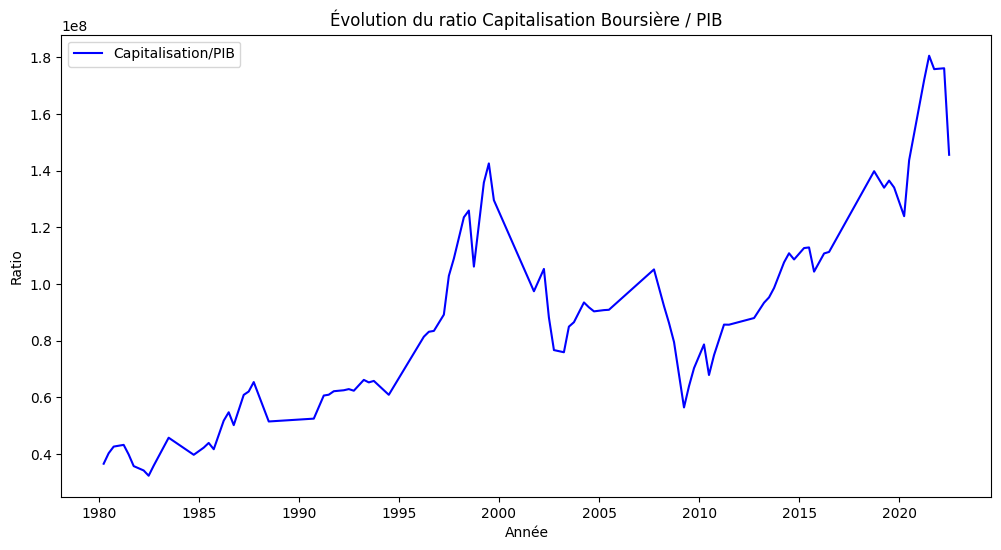

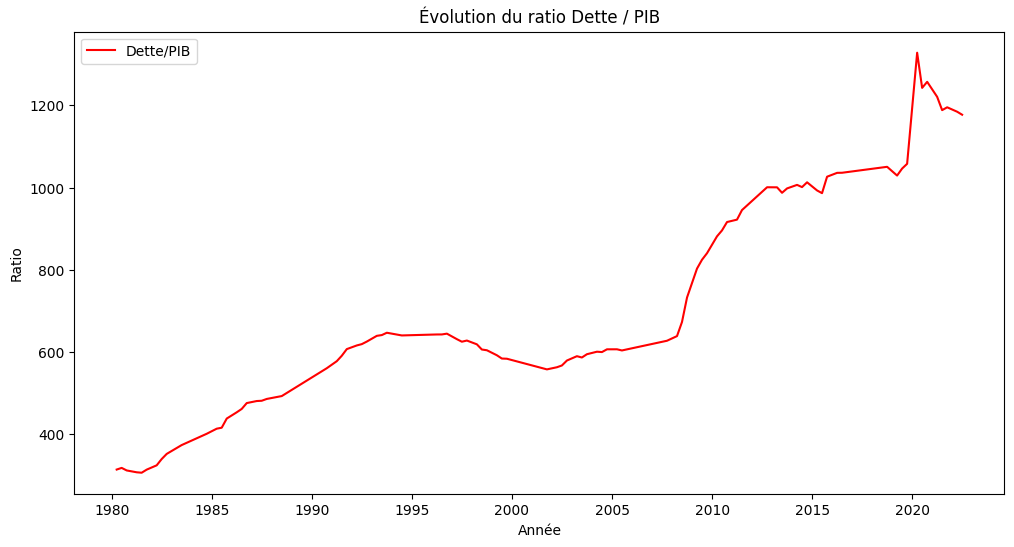

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique 1 : Évolution du ratio capitalisation boursière / PIB
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Ratio Capitalisation/PIB"], label="Capitalisation/PIB", color="blue")
plt.title("Évolution du ratio Capitalisation Boursière / PIB")
plt.xlabel("Année")
plt.ylabel("Ratio")
plt.legend()
plt.show()

# Graphique 2 : Évolution du ratio dette / PIB
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Ratio Dette/PIB"], label="Dette/PIB", color="red")
plt.title("Évolution du ratio Dette / PIB")
plt.xlabel("Année")
plt.ylabel("Ratio")
plt.legend()
plt.show()

**Analyse sur les trois dernières années**

Date range in recent_data: 2019-07-01 00:00:00 to 2022-07-01 00:00:00
         Date  Ratio Capitalisation/PIB  Ratio Dette/PIB
82 2019-07-01              1.364971e+08      1046.149243
83 2019-10-01              1.340547e+08      1057.819288
84 2020-04-01              1.239250e+08      1328.149050
85 2020-07-01              1.436903e+08      1242.607744
86 2020-10-01              1.531939e+08      1257.333407
87 2021-04-01              1.720182e+08      1220.831259
88 2021-07-01              1.805845e+08      1188.401041
89 2021-10-01              1.758499e+08      1195.349299
90 2022-04-01              1.761566e+08      1184.562876
91 2022-07-01              1.456048e+08      1177.257120


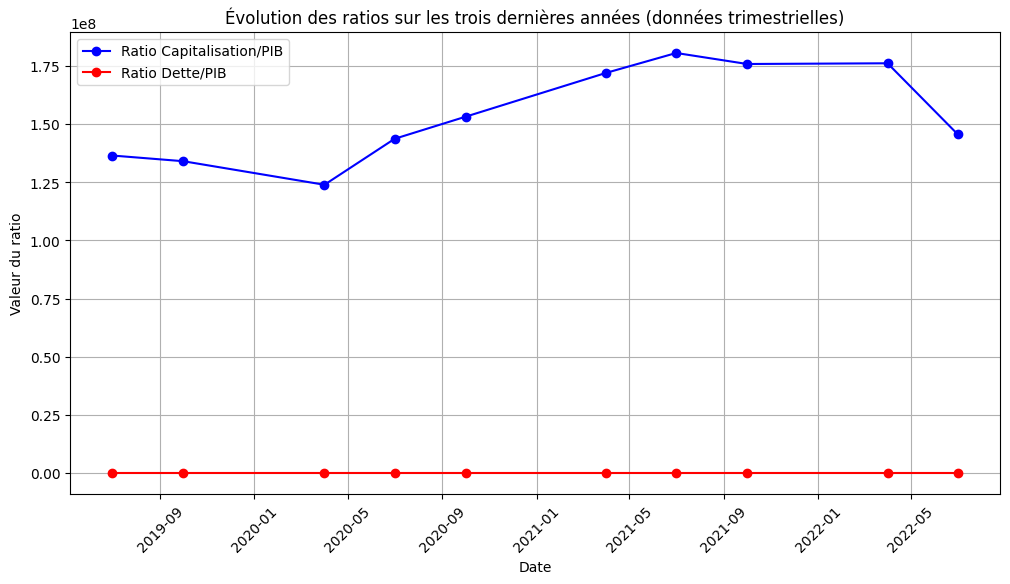

In [43]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# S'assurer que la colonne "Date" est bien au format datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculer la date de début pour les trois dernières années à partir de la dernière date disponible
three_years_ago = data['Date'].max() - pd.DateOffset(years=3)

# Filtrer les données pour les trois dernières années
recent_data = data[data['Date'] >= three_years_ago]

# Vérifier les dates dans les données filtrées
print("Date range in recent_data:", recent_data['Date'].min(), "to", recent_data['Date'].max())

# Vérifier les premières lignes
print(recent_data[['Date', 'Ratio Capitalisation/PIB', 'Ratio Dette/PIB']])

# Tracer les ratios
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Date'], recent_data['Ratio Capitalisation/PIB'], marker='o', label='Ratio Capitalisation/PIB', color='blue')
plt.plot(recent_data['Date'], recent_data['Ratio Dette/PIB'], marker='o', label='Ratio Dette/PIB', color='red')

# Ajouter des labels et un titre
plt.title('Évolution des ratios sur les trois dernières années (données trimestrielles)')
plt.xlabel('Date')
plt.ylabel('Valeur du ratio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Incliner les dates pour plus de lisibilité
plt.show()

**Statistiques descriptives**

In [ ]:
# Statistiques descriptives pour le ratio Capitalisation/PIB
print("Statistiques descriptives pour Ratio Capitalisation/PIB :")
print(data["Ratio Capitalisation/PIB"].describe())

# Statistiques descriptives pour le ratio Dette/PIB
print("\nStatistiques descriptives pour Ratio Dette/PIB :")
print(data["Ratio Dette/PIB"].describe())

Statistiques descriptives pour Ratio Capitalisation/PIB :
count    9.200000e+01
mean     8.730333e+07
std      3.611225e+07
min      3.229340e+07
25%      6.088845e+07
50%      8.562931e+07
75%      1.087359e+08
max      1.805845e+08
Name: Ratio Capitalisation/PIB, dtype: float64

Statistiques descriptives pour Ratio Dette/PIB :
count      92.000000
mean      709.057168
std       267.629043
min       306.033321
25%       562.121887
50%       625.048245
75%       986.589523
max      1328.149050
Name: Ratio Dette/PIB, dtype: float64


**Storytelling : La financiarisation et ses conséquences**

1. ## Introduction : Le contexte historique
Depuis les années 1980, l'économie mondiale a connu une transformation radicale : la financiarisation. Les marchés financiers, autrefois au service de l'économie réelle, ont pris une place prépondérante, influençant les décisions économiques et politiques. Comme l'a souligné Michael Hudson, cette tendance reflète une économie de plus en plus dominée par les profits financiers plutôt que par la production réelle. Cette dynamique s'est accélérée après la crise des subprimes de 2008, comme en témoignent les ratios Capitalisation boursière/PIB et Dette/PIB, qui ont augmenté de manière significative.

2. ## Les ratios comme indicateurs clés
Le ratio Capitalisation boursière/PIB mesure la taille des marchés financiers par rapport à l'économie réelle. Un ratio élevé indique que les investisseurs valorisent les entreprises à un niveau supérieur à la production économique totale. Le ratio Dette/PIB, quant à lui, reflète l'endettement total par rapport à la taille de l'économie. Une augmentation de ce ratio suggère une dépendance croissante à l'endettement pour soutenir la croissance. Comme l'explique Steve Keen, cette accumulation de dette peut entraîner une instabilité financière, car elle rend l'économie vulnérable aux chocs externes.

3. ## La crise de 2008 : Un tournant
La crise des subprimes de 2008 a marqué un tournant. Alors que l'économie réelle stagnait, les marchés financiers ont été soutenus par des politiques monétaires expansionnistes, comme les taux d'intérêt bas et l'assouplissement quantitatif. Ces mesures ont permis une reprise rapide des marchés boursiers, mais elles ont également alimenté une accumulation de dette. En conséquence, les ratios Capitalisation boursière/PIB et Dette/PIB ont augmenté de manière significative. Comme l'a prédit Hyman Minsky, les périodes de stabilité économique encouragent la prise de risque excessive, conduisant à des crises.

4. ## Les enseignements des économistes
Selon Michael Hudson, cette dynamique reflète une économie de rente, où les profits financiers dominent les profits productifs. Cela peut entraîner des inégalités croissantes et une instabilité économique. Steve Keen met en garde contre l'accumulation excessive de dette, qui peut conduire à une instabilité financière. Enfin, Hyman Minsky explique que les périodes de stabilité économique encouragent la prise de risque excessive, conduisant à des crises financières. Ces enseignements sont essentiels pour comprendre les tendances actuelles.

5. ## Les risques actuels
Aujourd'hui, les ratios élevés soulèvent des questions sur la soutenabilité de cette trajectoire. Une capitalisation boursière trop élevée par rapport au PIB peut indiquer une surévaluation des marchés, tandis qu'une dette excessive rend l'économie vulnérable aux chocs externes. Comme l'a montré Steve Keen, ces déséquilibres peuvent conduire à des crises financières majeures.

6. ## Conclusion : Repenser la finance
Face à ces défis, il est crucial de repenser le rôle de la finance dans l'économie. Des politiques visant à réguler les marchés financiers, à réduire l'endettement excessif et à promouvoir une croissance inclusive pourraient aider à prévenir de futures crises et à construire une économie plus résiliente. Comme l'ont souligné Michael Hudson, Steve Keen et Hyman Minsky, une économie équilibrée doit prioriser la production réelle et limiter les excès de la financiarisation.

   ## Références:

 Hudson, M. (2012). The Bubble and Beyond. ISLET-Verlag.

 Keen, S. (2011). Debunking Economics. Zed Books.

 Minsky, H. (1986). Stabilizing an Unstable Economy. Yale University Press.